# Data and returns

In [1]:
# Install and import pandas_datareader
import pandas as pd
import numpy as np
# !pip install --upgrade pandas-datareader
from pandas_datareader import DataReader as pdr
pd.options.display.float_format = '{:.2f}'.format

## Economic data from FRED

In [2]:
# 10-year Treasury Yield from FRED
y10 = pdr("DGS10", "fred", start="1929-12-01")

In [3]:
y10

,DGS10
DATE,
1962-01-02,4.06
1962-01-03,4.03
1962-01-04,3.99
1962-01-05,4.02
1962-01-08,4.03
...,...
2022-11-28,3.69
2022-11-29,3.75
2022-11-30,3.68


<AxesSubplot:xlabel='DATE'>

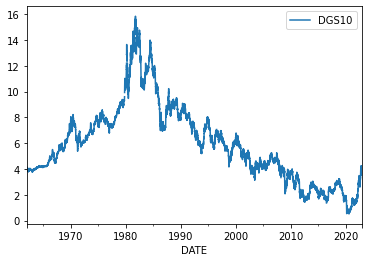

In [4]:
# A quick and dirty plot
y10.plot()

In [5]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=y10.index, y=y10.DGS10, mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

## Stock prices

In [6]:
# Pull stock information
ticker = 'AAPL'
df = pdr(ticker, "yahoo", start=2000, end=2020)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.00,0.91,0.94,1.00,535796800.00,0.85
2000-01-04,0.99,0.90,0.97,0.92,512377600.00,0.78
2000-01-05,0.99,0.92,0.93,0.93,778321600.00,0.79
2000-01-06,0.96,0.85,0.95,0.85,767972800.00,0.72
2000-01-07,0.90,0.85,0.86,0.89,460734400.00,0.76
...,...,...,...,...,...,...
2019-12-24,71.22,70.73,71.17,71.07,48478800.00,69.62
2019-12-26,72.50,71.18,71.21,72.48,93121200.00,71.00
2019-12-27,73.49,72.03,72.78,72.45,146266000.00,70.98


### Daily returns

In [7]:
pd.options.display.float_format = '{:.4f}'.format
ret = df['Adj Close'].pct_change()
ret

Date
2000-01-03       NaN
2000-01-04   -0.0843
2000-01-05    0.0146
2000-01-06   -0.0865
2000-01-07    0.0474
               ...  
2019-12-24    0.0010
2019-12-26    0.0198
2019-12-27   -0.0004
2019-12-30    0.0059
2019-12-31    0.0073
Name: Adj Close, Length: 5031, dtype: float64

### Monthly returns

In [8]:
# Keep just the last data adjusted close data point each month
df_monthly = df["Adj Close"].resample("M").last()
df_monthly

Date
2000-01-31    0.7896
2000-02-29    0.8724
2000-03-31    1.0337
2000-04-30    0.9442
2000-05-31    0.6393
               ...  
2019-08-31   50.9714
2019-09-30   54.6904
2019-10-31   60.7438
2019-11-30   65.4547
2019-12-31   71.9206
Freq: M, Name: Adj Close, Length: 240, dtype: float64

In [9]:
# Calculate a return
ret_monthly = df_monthly.pct_change()
ret_monthly

Date
2000-01-31       NaN
2000-02-29    0.1048
2000-03-31    0.1848
2000-04-30   -0.0865
2000-05-31   -0.3229
               ...  
2019-08-31   -0.0165
2019-09-30    0.0730
2019-10-31    0.1107
2019-11-30    0.0776
2019-12-31    0.0988
Freq: M, Name: Adj Close, Length: 240, dtype: float64

In [10]:
ret_monthly.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', length=240, freq='M')

In [11]:
# Change datetime index to monthly period index
ret_monthly.index = ret_monthly.index.to_period("M")
ret_monthly.index

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08',
             '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', name='Date', length=240)

In [12]:
# Add a name to the series
ret_monthly.name = "ret"
ret_monthly

Date
2000-01       NaN
2000-02    0.1048
2000-03    0.1848
2000-04   -0.0865
2000-05   -0.3229
            ...  
2019-08   -0.0165
2019-09    0.0730
2019-10    0.1107
2019-11    0.0776
2019-12    0.0988
Freq: M, Name: ret, Length: 240, dtype: float64

In [13]:
# Summary statistics
print(f'Avg monthly return:\t {ret_monthly.mean(): ,.4f}')
print(f'SD(monthly returns):\t {ret_monthly.std(): ,.4f}')

# annualized summary stats
print('\nAnnualized stats:')
print(f'Avg return:\t {ret_monthly.mean()*12: ,.4f}')
print(f'SD(return):\t {ret_monthly.std()*np.sqrt(12): ,.4f}')

Avg monthly return:	  0.0263
SD(monthly returns):	  0.1166

Annualized stats:
Avg return:	  0.3161
SD(return):	  0.4038


<AxesSubplot:xlabel='Date'>

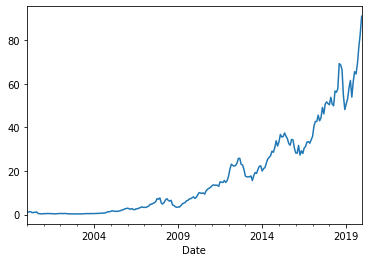

In [14]:
# Cumulative returns
(1+ret_monthly).cumprod().plot()

In [15]:
# A prettier picture with hoverdata
import plotly.graph_objects as go
trace1= go.Scatter(x=ret_monthly.index.to_timestamp("M"), y=(1+ret_monthly).cumprod(), mode="lines")
fig = go.Figure()
fig.add_trace(trace1)
fig.show()

In [16]:
# Alternatively, monthly returns can be calculated by compounding daily rets
df['ret']= df['Adj Close'].pct_change()+1
df['month']=df.index.to_period('M')
df


,High,Low,Open,Close,Volume,Adj Close,ret,month
Date,,,,,,,,
2000-01-03,1.0045,0.9079,0.9364,0.9994,535796800.0000,0.8519,NaN,2000-01
2000-01-04,0.9877,0.9035,0.9665,0.9152,512377600.0000,0.7801,0.9157,2000-01
2000-01-05,0.9872,0.9196,0.9263,0.9286,778321600.0000,0.7915,1.0146,2000-01
2000-01-06,0.9554,0.8482,0.9475,0.8482,767972800.0000,0.7230,0.9135,2000-01
2000-01-07,0.9018,0.8527,0.8616,0.8884,460734400.0000,0.7573,1.0474,2000-01
...,...,...,...,...,...,...,...,...
2019-12-24,71.2225,70.7300,71.1725,71.0675,48478800.0000,69.6232,1.0010,2019-12
2019-12-26,72.4950,71.1750,71.2050,72.4775,93121200.0000,71.0046,1.0198,2019-12
2019-12-27,73.4925,72.0300,72.7800,72.4500,146266000.0000,70.9776,0.9996,2019-12


In [17]:
mrets = df.groupby('month')['ret'].prod()-1

In [18]:
df_joined = pd.merge(mrets,ret_monthly,left_index=True,right_index=True)
df_joined.corr()
# df_joined

,ret_x,ret_y
ret_x,1.0000,1.0000
ret_y,1.0000,1.0000


#### Data on equity portfolios from Ken French Data Library
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [19]:
# Some factors
ff3 = pdr('F-F_Research_Data_Factors','famafrench', start=1900)[0]/100
# Clean-up missings
for c in ff3.columns:
    ff3[c] = np.where(ff3[c]==-99.99, np.nan, ff3[c])

# Some industry portfolios
ff48 = pdr("48_Industry_Portfolios", "famafrench", start=1900)[0]
# Clean-up missings
for c in ff48.columns:
    ff48[c] = np.where(ff48[c]==-99.99, np.nan, ff48[c])
ff48 = ff48/100

In [20]:
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031
...,...,...,...,...
2022-06,-0.0843,0.0209,-0.0597,0.0006
2022-07,0.0957,0.0281,-0.0410,0.0008
2022-08,-0.0377,0.0139,0.0031,0.0019


In [21]:
# What does the following represent?
mrp = ff3['Mkt-RF'].mean()*12
print(f'The arithmetic average market risk premium (annualized): {mrp:.2%}')

The arithmetic average market risk premium (annualized): 8.05%


In [22]:
from scipy.stats import gmean

geomean = (gmean(1+ff3['Mkt-RF'])-1)*12
print(f'The geometric average market risk premium (annualized): {geomean:.2%}')

The geometric average market risk premium (annualized): 6.33%


In [23]:
ff48

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0237,0.0012,NaN,-0.0519,0.0129,0.0865,0.0250,0.5021,-0.0048,0.0808,...,0.0770,0.0192,-0.2379,0.0007,0.0187,0.0461,-0.0054,0.0289,-0.0577,0.0520
1926-08,0.0223,0.0268,NaN,0.2703,0.0650,0.1681,-0.0076,0.4298,-0.0358,-0.0251,...,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.1183,0.0257,0.0530,0.0032,0.0676
1926-09,-0.0057,0.0158,NaN,0.0402,0.0126,0.0833,0.0642,-0.0491,0.0073,-0.0051,...,-0.0554,0.0008,-0.0787,0.0025,-0.0056,-0.0175,0.0072,-0.0306,-0.0481,-0.0386
1926-10,-0.0046,-0.0368,NaN,-0.0331,0.0106,-0.0140,-0.0509,0.0537,-0.0468,0.0012,...,-0.0508,-0.0262,-0.1538,-0.0220,-0.0411,-0.1182,-0.0428,-0.0574,-0.0094,-0.0849
1926-11,0.0675,0.0626,NaN,0.0729,0.0455,0.0000,0.0182,-0.0640,-0.0054,0.0187,...,0.0384,0.0161,0.0467,0.0652,0.0433,-0.0297,0.0358,0.0221,0.0513,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06,-0.1245,-0.0191,0.0046,-0.0002,-0.1163,-0.1296,-0.1087,-0.1237,-0.0256,-0.1200,...,-0.0844,-0.0714,-0.0643,-0.0850,-0.0902,-0.1239,-0.0205,-0.1360,-0.0979,-0.1267
2022-07,0.0638,0.0368,0.0328,0.0549,0.0056,0.0563,0.1704,0.1208,0.0076,0.1186,...,0.0709,0.0933,0.0908,0.1633,0.1189,0.0854,0.0315,0.1410,0.1044,0.1001
2022-08,0.0523,-0.0046,-0.0440,-0.0187,-0.0012,-0.0577,-0.0226,-0.0500,-0.0216,-0.0601,...,-0.0911,-0.0146,-0.0160,-0.0346,-0.0147,-0.0341,-0.0084,-0.0612,-0.0102,-0.0403


### Our own function to pull monthly returns data

In [24]:
# Function to fetch a yahoo time-series
def returns(ticker):
    ret = pdr(ticker, "yahoo", start=2000)
    ret = ret["Adj Close"].resample("M").last()
    ret = ret.pct_change()
    ret.index = ret.index.to_period("M")
    ret.name = ticker
    return ret
aapl = returns('AAPL')
ibm = returns('IBM')

### Portfolios

In [25]:
# Merging time-series
df = pd.merge(left=ibm,right=aapl,how='inner',left_index=True,right_index=True)
df

,IBM,AAPL
Date,,
2000-01,NaN,NaN
2000-02,-0.0837,0.1048
2000-03,0.1521,0.1848
2000-04,-0.0581,-0.0865
2000-05,-0.0364,-0.3229
...,...,...
2022-08,-0.0055,-0.0312
2022-09,-0.0750,-0.1210
2022-10,0.1640,0.1096


In [26]:
df.corr()

,IBM,AAPL
IBM,1.0000,0.4327
AAPL,0.4327,1.0000


Mean of  50.00% portfolio is:  1.59% (per month)
Mean of  75.00% portfolio is:  2.10% (per month)


<AxesSubplot:xlabel='Date'>

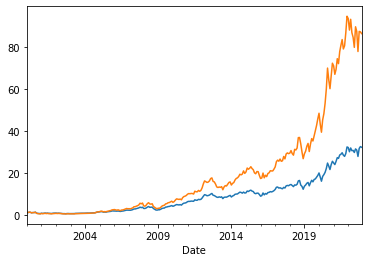

In [27]:
# How would different portfolios of AAPL and IBM have fared?

wgt = 0.5
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print(f'Mean of {wgt: .2%} portfolio is: {df.retp.mean(): .2%} (per month)')
df.cumretp.plot()


wgt = 0.75
df['retp'] = wgt*df.AAPL + (1-wgt)*df.IBM
df['cumretp'] = (1+df['retp']).cumprod()
print(f'Mean of {wgt: .2%} portfolio is: {df.retp.mean(): .2%} (per month)')
df.cumretp.plot()


#### Check that pandas .std() makes degrees of freedom adjustment

In [28]:
ret = ret[ret.isnull()==False]
ret.std()

0.025394040852797096

In [29]:
squared_errors = (ret - ret.mean())**2
sse = squared_errors.sum()
T = ret.count()
np.sqrt((1/(T-1)) * sse)

0.025394040852797096